In [1]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from PIL import Image
from tensorflow import keras
from collections import Counter

2022-11-30 20:21:58.239811: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 20:21:59.982272: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-30 20:21:59.982598: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-30 20:21:59.982613: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
img = np.load("../celeb_transformed/Angelina Jolie/001_fe3347c0.npy")

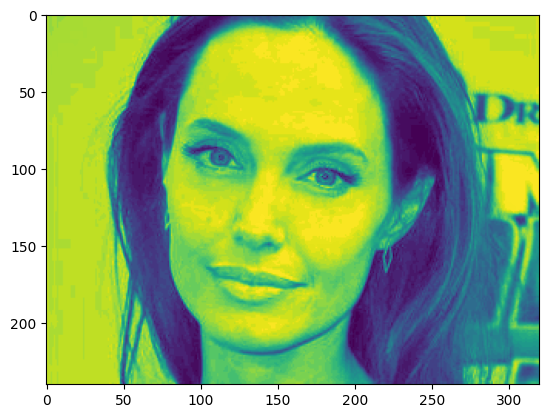

In [3]:
plt.imshow(img.T)

In [4]:
def _565_to_888(data: np.ndarray) -> Image:
    width, height = data.shape
    img = Image.new('RGB', (width, height))

    for x in range(width):
        for y in range(height):
            pixel = data[x, y]
            r = (pixel & 0xF800) >> 11 # F800: bits 11-15
            g = (pixel & 0x07E0) >> 5  # 07E0: bits 5-10
            b = (pixel & 0x1F)         # 001F: bits 0-4
            img.putpixel((x, y), (r * 8, g * 4, b * 8)) # multiply by (8, 4, 8) to scale back to [0,255]

    return img

In [5]:
def img_to_tensor(img: np.ndarray) -> np.ndarray:
    return keras.utils.img_to_array(_565_to_888(img))

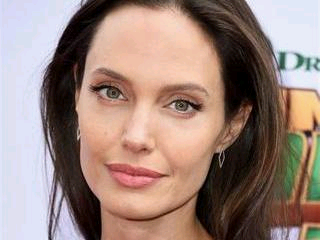

In [6]:
_565_to_888(img)

In [7]:
img_array = img_to_tensor(img)
img_array.shape

(240, 320, 3)

In [8]:
celebs_path = Path("../celeb_transformed")
label_names = [celeb.name for celeb in celebs_path.iterdir()]

In [9]:
le = LabelEncoder()
le.fit(label_names)
print(le.classes_)
le.transform(label_names)

['Angelina Jolie' 'Brad Pitt' 'Denzel Washington' 'Hugh Jackman'
 'Jennifer Lawrence' 'Johnny Depp' 'Kate Winslet' 'Leonardo DiCaprio'
 'Megan Fox' 'Natalie Portman' 'Nicole Kidman' 'Robert Downey Jr'
 'Sandra Bullock' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Will Smith']


array([15, 10,  5,  7, 11,  1,  6,  3, 16,  8, 14,  9,  4, 13,  2, 12,  0])

In [ ]:
labels = []
data = []
for celeb in tqdm(celebs_path.iterdir()):
    for file in celeb.iterdir():
        img = np.load(file)
        data.append(img_to_tensor(img))
        labels.append(le.transform([celeb.name])[0])

labels = np.array(labels)
data = np.array(data)

In [ ]:
print(labels.shape)
print(data.shape)

In [ ]:
print(Counter(labels))

Save the transformed data as ready to use tensor and labels, with classes that can be loaded to labelEncoder

In [ ]:
with open("data.npy", "wb") as f:
    np.save(f, data)

In [ ]:
with open("labels.npy", "wb") as f:
    np.save(f, labels)

In [ ]:
with open("classes.npy", "wb") as f:
    np.save(f, le.classes_)